In [1]:
import pandas as pd

import ast

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/data-jobs-by-lukebarousse/data_jobs.csv")

#convert string type "job_posted_date" to datetime object
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

#convert string type "job_skills" to list, with apply()
df["job_skills"] = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

#get dataframe specific to India
india_df = df[df["job_country"] == "India"]

india_df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,NaN,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."


In [3]:
#get the top 3 job posted roles
top_3_roles = india_df["job_title_short"].value_counts().head(3).index

top_3_roles

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

In [4]:
#get a new datarame, where only the index of "top_3_roles" are there
india_top_3_roles_df = india_df[india_df["job_title_short"].isin(top_3_roles)]

india_top_3_roles_df[["job_title_short", "job_skills"]]

,job_title_short,job_skills
16,Data Engineer,"[powershell, python, sql, mysql, sql server, d..."
19,Data Scientist,"[r, sql, python, scala, java, c++, hadoop, tab..."
29,Data Scientist,NaN
38,Data Analyst,"[sql, python, databricks, power bi, excel, wor..."
80,Data Engineer,"[gcp, graphql, kubernetes]"
...,...,...
785691,Data Analyst,"[sql, python, shell, sql server, tableau, micr..."
785695,Data Engineer,"[python, sql, scala, aws, snowflake, databrick..."
785697,Data Scientist,"[python, sql, r, power bi, tableau, word, exce..."
785712,Data Engineer,"[excel, flow]"


In [5]:
#convert each element of "job_skills" from list-like to row
india_top_3_roles_top_skills = india_top_3_roles_df.explode("job_skills")

india_top_3_roles_top_skills[["job_title_short", "job_skills"]]

,job_title_short,job_skills
16,Data Engineer,powershell
16,Data Engineer,python
16,Data Engineer,sql
16,Data Engineer,mysql
16,Data Engineer,sql server
...,...,...
785697,Data Scientist,jira
785697,Data Scientist,confluence
785712,Data Engineer,excel
785712,Data Engineer,flow


In [6]:
#group by "job_title_short" and "job_skills" and count the number of job posted for specific "job_skills"
top_3_roles_and_skills_group = india_top_3_roles_top_skills.groupby(["job_title_short", "job_skills"]).size()

#to transform a series to a DataFrame, use "reset_index()", and sort the values, by "skills_count" from descending to ascednding
top_3_roles_and_skills_group = top_3_roles_and_skills_group.reset_index(name = "skills_count").sort_values(by = "skills_count", ascending = False)

top_3_roles_and_skills_group

,job_title_short,job_skills,skills_count
352,Data Engineer,sql,12993
318,Data Engineer,python,11568
522,Data Scientist,python,9248
347,Data Engineer,spark,7157
195,Data Engineer,aws,6993
...,...,...,...
503,Data Scientist,nuix,1
550,Data Scientist,solidity,1
360,Data Engineer,symfony,1
438,Data Scientist,esquisse,1


In [7]:
#to get the percentage of "skills_count" , get total jobs in each role
total_jobs_each_role = india_df["job_title_short"].value_counts().reset_index(name = "total_jobs")

total_jobs_each_role

,job_title_short,total_jobs
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [8]:
#merge the 2 dataframes - "top_3_roles_and_skills_group" and "total_jobs_each_role"
top_3_roles_and_skills_group_with_cents = top_3_roles_and_skills_group.merge(total_jobs_each_role, on = "job_title_short")

#add a new column "skills_percentage" on this dataframe by taking the percentage of "skills_count" and "total_jobs"
top_3_roles_and_skills_group_with_cents["skills_percentage"] = (top_3_roles_and_skills_group_with_cents["skills_count"] / top_3_roles_and_skills_group_with_cents["total_jobs"]) * 100

top_3_roles_and_skills_group_with_cents

,job_title_short,job_skills,skills_count,total_jobs,skills_percentage
0,Data Engineer,sql,12993,19062,68.161788
1,Data Engineer,python,11568,19062,60.686182
2,Data Scientist,python,9248,13279,69.643798
3,Data Engineer,spark,7157,19062,37.545903
4,Data Engineer,aws,6993,19062,36.685552
...,...,...,...,...,...
588,Data Scientist,nuix,1,13279,0.007531
589,Data Scientist,solidity,1,13279,0.007531
590,Data Engineer,symfony,1,19062,0.005246
591,Data Scientist,esquisse,1,13279,0.007531


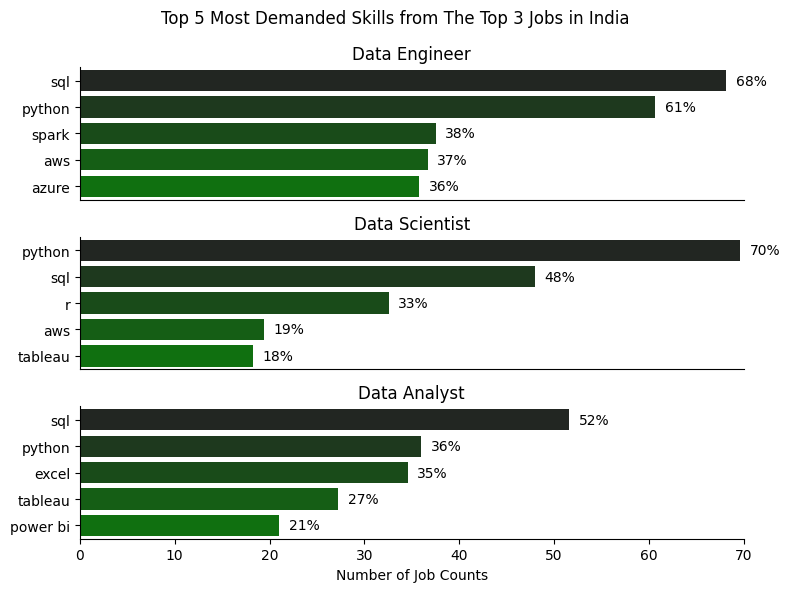

In [9]:
fig, ax = plt.subplots(len(top_3_roles), 1, figsize = (8, 6))

#loop through the "top_3_roles" to get the dataframe containing only the job roles in each index
for idx, job_title in enumerate(top_3_roles):

    top_job_with_top_5_demanded_skills = top_3_roles_and_skills_group_with_cents[top_3_roles_and_skills_group_with_cents["job_title_short"] == job_title].head()

    sns.barplot(data = top_job_with_top_5_demanded_skills, x = "skills_percentage", y = "job_skills", hue = "skills_count", palette = "dark:green_r", dodge = False, ax = ax[idx])

    ax[idx].legend().remove()

    ax[idx].set_title(job_title)

    ax[idx].set_xlim(0, 70)

    ax[idx].set_xlabel("")

    ax[idx].set_ylabel("")

    #remove the x-axis tick labels for better readability
    if idx != len(top_3_roles) - 1:

        ax[idx].set_xticks([])

    #label the percentage on the bars
    for idxx, percentage in enumerate(top_job_with_top_5_demanded_skills["skills_percentage"]):

        ax[idx].text(percentage + 1, idxx, f"{percentage:.0f}%", va = "center")

plt.xlabel("Number of Job Counts")

fig.suptitle("Top 5 Most Demanded Skills from The Top 3 Jobs in India")

plt.tight_layout()

sns.despine()

plt.show()